# Blog Submission¶

# Contents

1. Problem Definition.

2. Data Analysis.

3. EDA Concluding Remark.

4. Pre-Processing Pipeline.

5. Building Machine Learning Models.

6. Concluding Remarks.

# 1. Problem Definition

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Given that we have data on former employees, this is a standard supervised classification problem where the label is a binary variable, 0 (active employee), 1 (former employee). In this study, our target variable Y is the probability of an employee leaving the company.

# 2. Data Analysis.

In this case study, a HR dataset was sourced from HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. I will use this dataset to predict when employees are going to quit by understanding the main drivers of employee churn.

# Import libraries

## HR Analytics

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 2.1 Data Description and Exploratory Visualisations

first, we import the dataset.
The dataset contains 1470 rows and 35 columns.

In [2]:
# loading the dataset 
hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# checking shape of DataFrame
hr.shape

(1470, 35)

The dataset contains several numerical and categorical columns providing various information on employee’s personal and employment details.


In [4]:
# Dataset columns
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# first 5 rows and columns
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Let’s break down the columns by their type (i.e. int64, float64, object):


In [6]:
# checking data type 
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
# Data Information
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# finding the missing values

In [8]:
# ckecking null values
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# 2.2 Data source

The data provided has no missing values. In HR Analytics, employee data is unlikely to feature large ratio of missing values as HR Departments typically have all personal and employment data on-file.

However, the type of documentation data is being kept in (i.e. whether it is paper-based, Excel spreadsheets, databases, etc) has a massive impact on the accuracy and the ease of access to the HR data.

<AxesSubplot:>

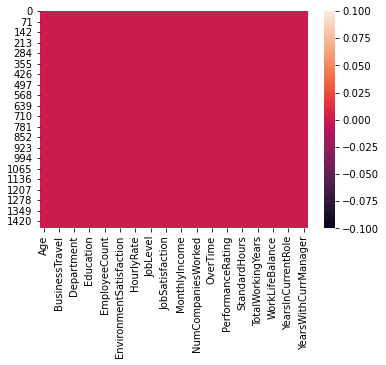

In [9]:
sns.heatmap(hr.isnull())

# summary statistics

In [10]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history.

# Data Visualization

<AxesSubplot:xlabel='Age', ylabel='count'>

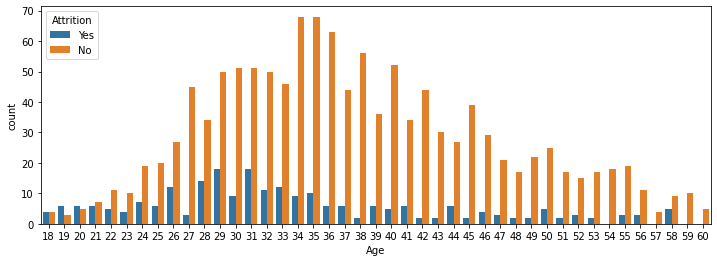

In [12]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age',hue='Attrition',data=hr)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

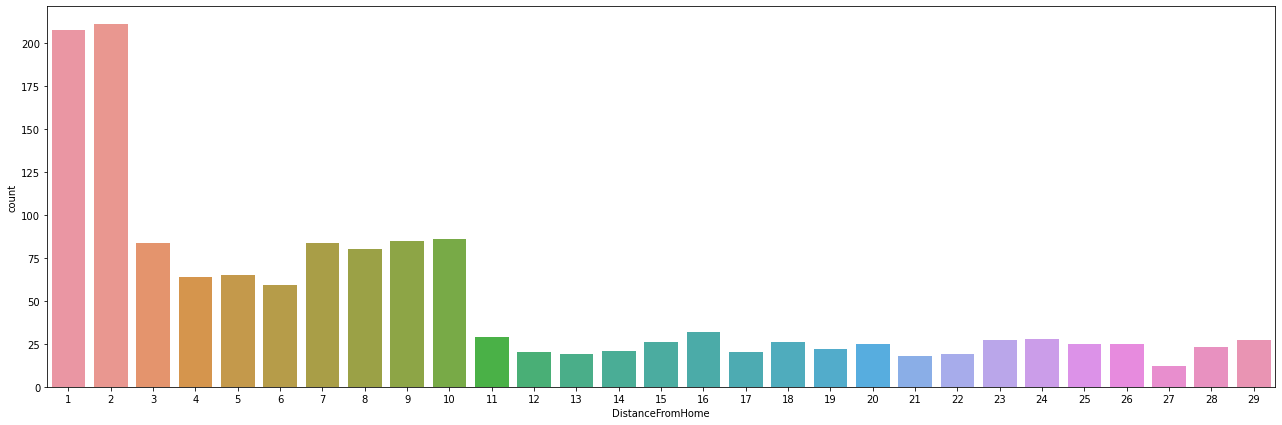

In [13]:
plt.figure(figsize=(22,7))
sns.countplot(hr['DistanceFromHome'])

No     1233
Yes     237
Name: Attrition, dtype: int64

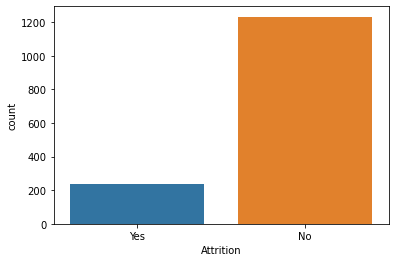

In [14]:
sns.countplot(hr['Attrition'])
hr['Attrition'].value_counts()

The feature “Attrition” is what this Machine Learning problem is about. We are trying to predict the value of the feature ‘Attrition’ by using other related features associated with the employee’s personal and professional history.
In the supplied dataset, the percentage of Current Employees is 83.9% and of Ex-employees is 16.1%. Hence, this is an imbalanced class problem.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

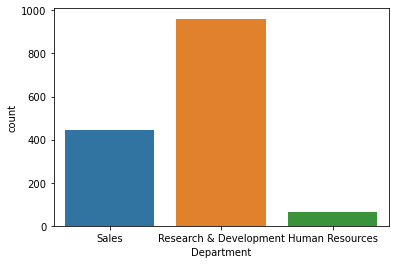

In [15]:
sns.countplot(hr['Department'])
hr['Department'].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
17     20
12     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

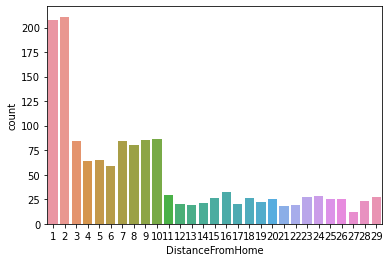

In [16]:
sns.countplot(hr['DistanceFromHome'])
hr['DistanceFromHome'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

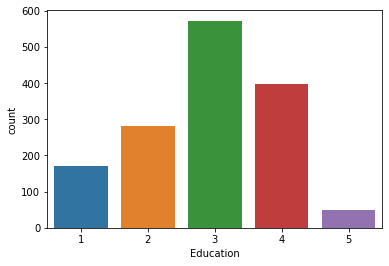

In [17]:
sns.countplot(hr['Education'])
hr['Education'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

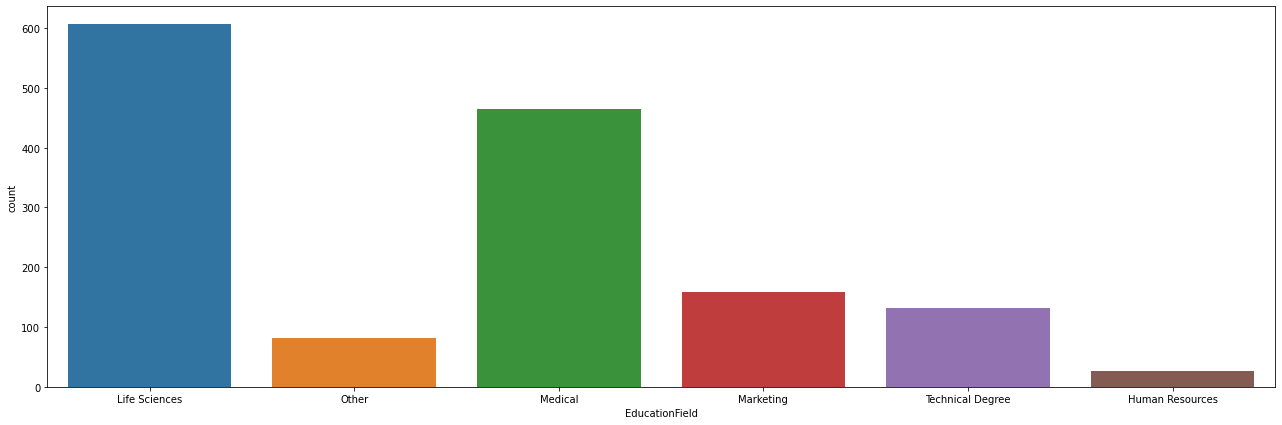

In [18]:
plt.figure(figsize=(22,7))
sns.countplot(hr['EducationField'])
hr['EducationField'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

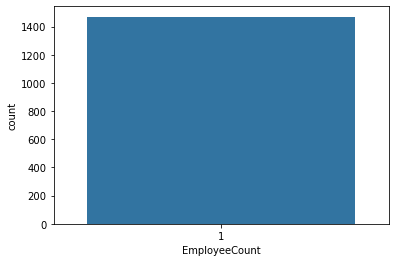

In [19]:
sns.countplot(hr['EmployeeCount'])
hr['EmployeeCount'].value_counts()

In [20]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

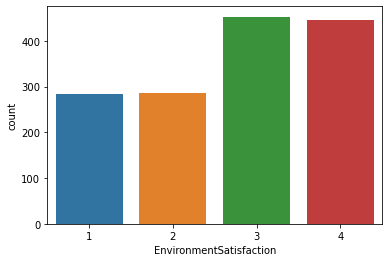

In [21]:
sns.countplot(hr['EnvironmentSatisfaction'])
hr['EnvironmentSatisfaction'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

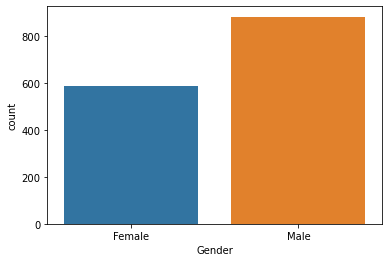

In [22]:
sns.countplot(hr['Gender'])
hr['Gender'].value_counts()

66    29
42    28
98    28
84    28
48    28
      ..
69    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

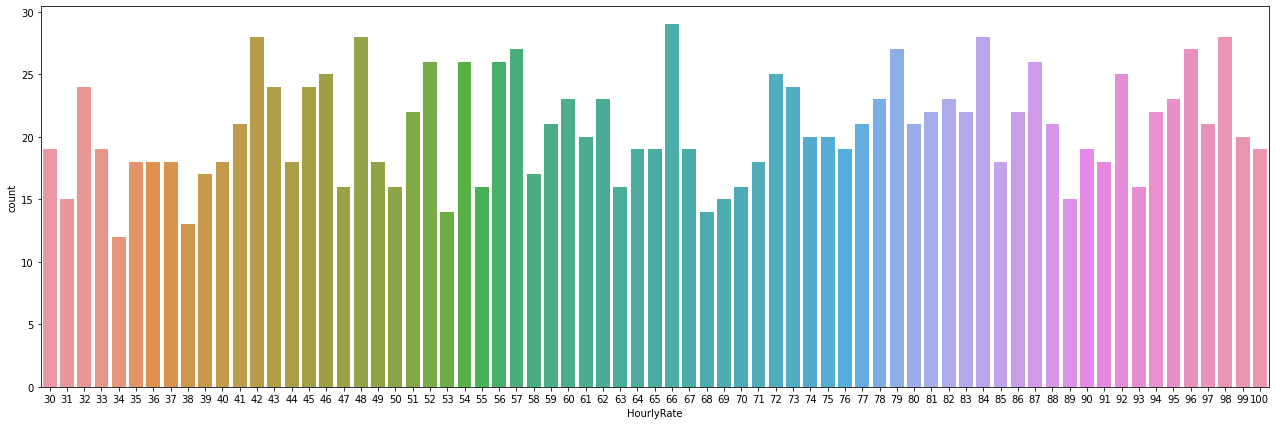

In [23]:
plt.figure(figsize=(22,7))
sns.countplot(hr['HourlyRate'])
hr['HourlyRate'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

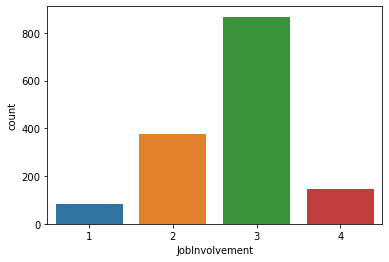

In [24]:
sns.countplot(hr['JobInvolvement'])
hr['JobInvolvement'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

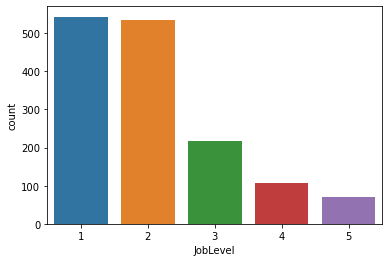

In [25]:
sns.countplot(hr['JobLevel'])
hr['JobLevel'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

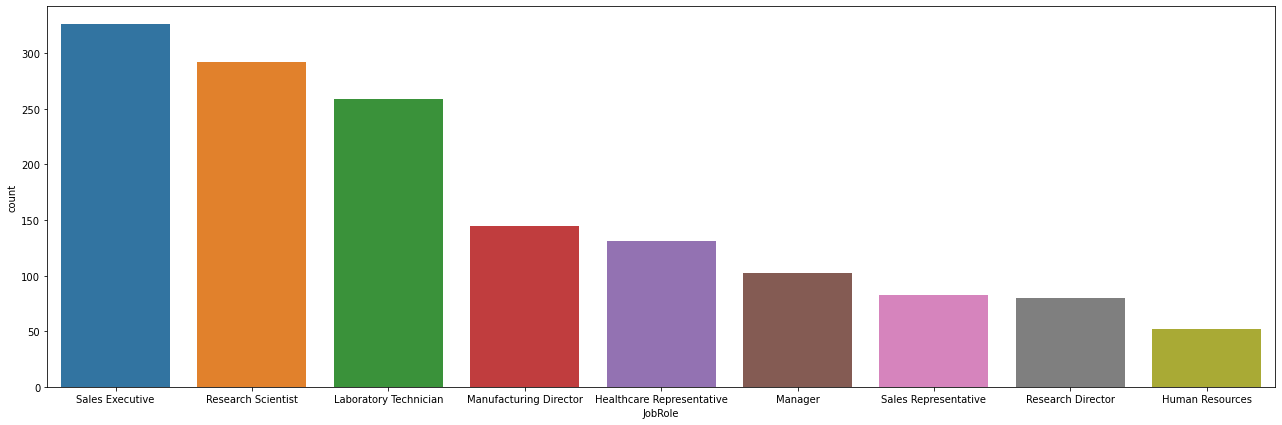

In [26]:
plt.figure(figsize=(22,7))
sns.countplot(hr['JobRole'])
hr['JobRole'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

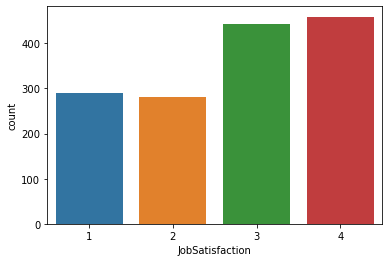

In [27]:
sns.countplot(hr['JobSatisfaction'])
hr['JobSatisfaction'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

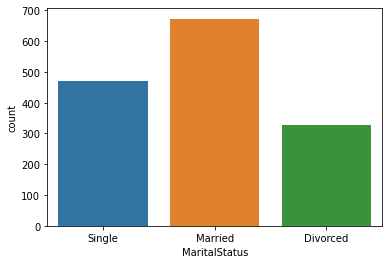

In [28]:
sns.countplot(hr['MaritalStatus'])
hr['MaritalStatus'].value_counts()

2342     4
6142     3
2610     3
2559     3
6347     3
        ..
4103     1
2705     1
6796     1
19717    1
10239    1
Name: MonthlyIncome, Length: 1349, dtype: int64

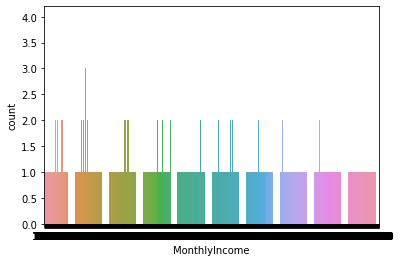

In [29]:
sns.countplot(hr['MonthlyIncome'])
hr['MonthlyIncome'].value_counts()

4223     3
9150     3
9096     2
13008    2
12858    2
        ..
17071    1
23213    1
3835     1
25258    1
12287    1
Name: MonthlyRate, Length: 1427, dtype: int64

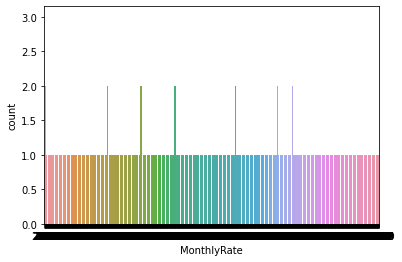

In [30]:
sns.countplot(hr['MonthlyRate'])
hr['MonthlyRate'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

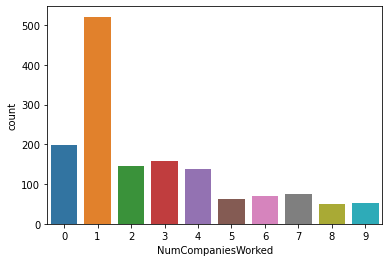

In [31]:
sns.countplot(hr['NumCompaniesWorked'])
hr['NumCompaniesWorked'].value_counts()

Y    1470
Name: Over18, dtype: int64

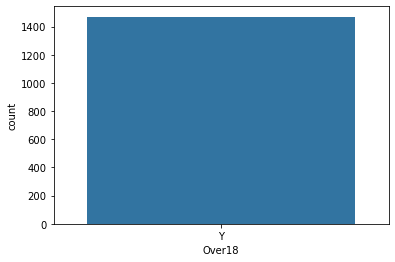

In [32]:
sns.countplot(hr['Over18'])
hr['Over18'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

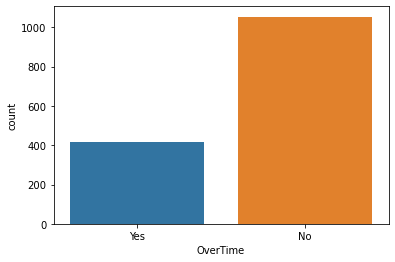

In [33]:
sns.countplot(hr['OverTime'])
hr['OverTime'].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

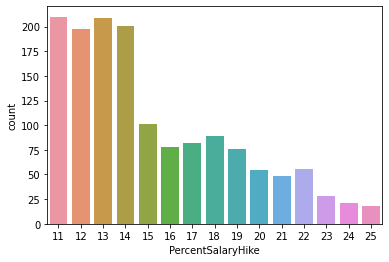

In [34]:
sns.countplot(hr['PercentSalaryHike'])
hr['PercentSalaryHike'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

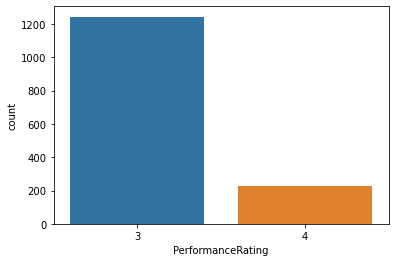

In [35]:
sns.countplot(hr['PerformanceRating'])
hr['PerformanceRating'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

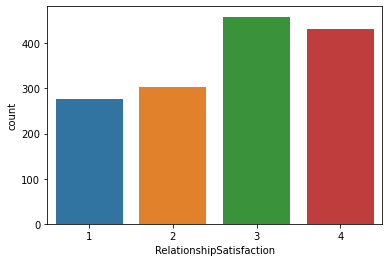

In [36]:
sns.countplot(hr['RelationshipSatisfaction'])
hr['RelationshipSatisfaction'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

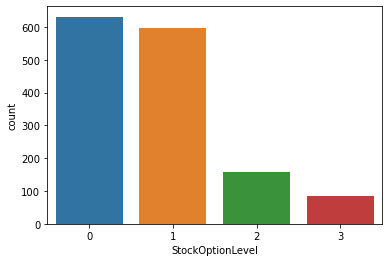

In [37]:
sns.countplot(hr['StockOptionLevel'])
hr['StockOptionLevel'].value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
28     14
25     14
26     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

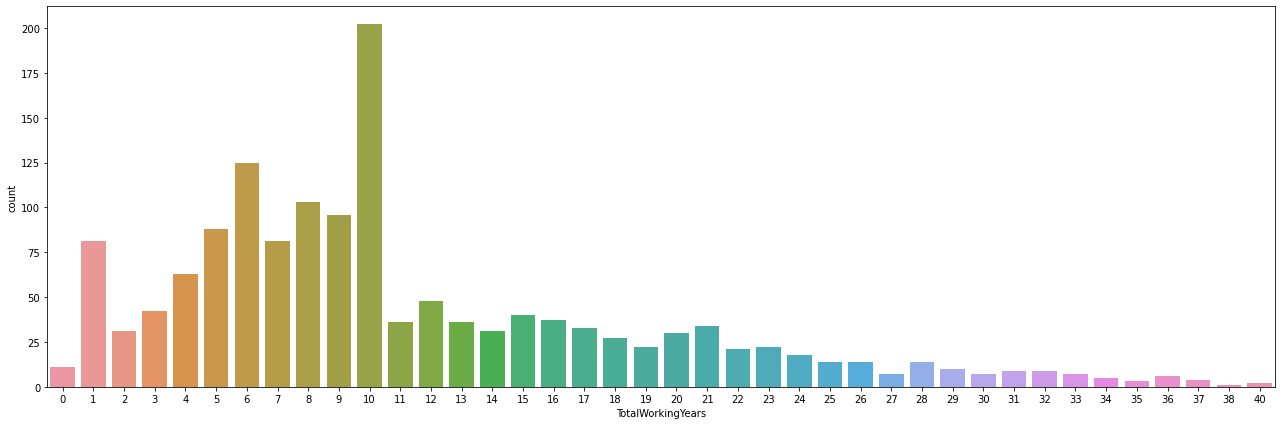

In [38]:
plt.figure(figsize=(22,7))
sns.countplot(hr['TotalWorkingYears'])
hr['TotalWorkingYears'].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

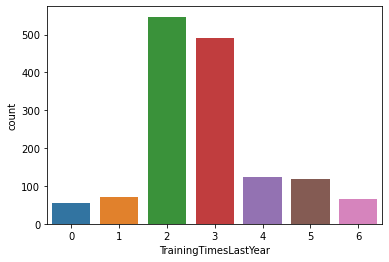

In [39]:
sns.countplot(hr['TrainingTimesLastYear'])
hr['TrainingTimesLastYear'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

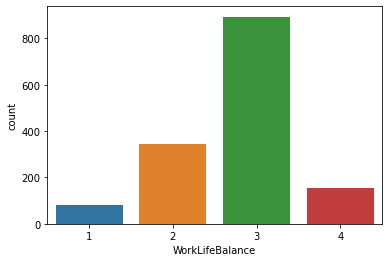

In [40]:
sns.countplot(hr['WorkLifeBalance'])
hr['WorkLifeBalance'].value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
29      2
27      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

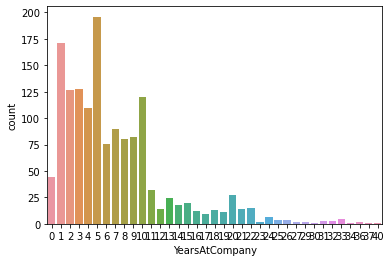

In [41]:
sns.countplot(hr['YearsAtCompany'])
hr['YearsAtCompany'].value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

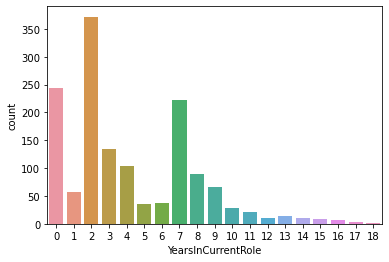

In [42]:
sns.countplot(hr['YearsInCurrentRole'])
hr['YearsInCurrentRole'].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
12     10
13     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

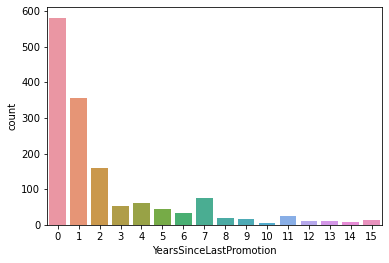

In [43]:
sns.countplot(hr['YearsSinceLastPromotion'])
hr['YearsSinceLastPromotion'].value_counts()

In [44]:
hr = hr.drop('EmployeeNumber',axis=1)
hr = hr.drop('Over18',axis=1)
hr = hr.drop('StandardHours',axis =1)
hr = hr.drop('EmployeeCount',axis = 1)

# correlation

In [45]:
hr_cor = hr.corr()
hr_cor

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

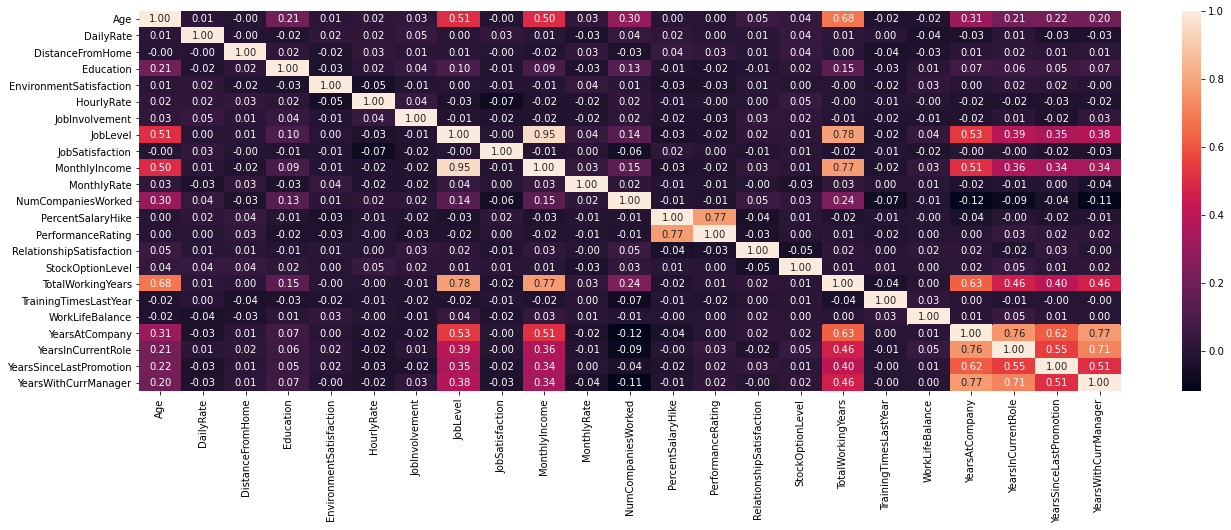

In [46]:
plt.figure(figsize=(22,7))
sns.heatmap(hr_cor ,annot=True , fmt ='0.2f')

As shown above, "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition;
while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.

In [47]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# 3 EDA Concluding Remarks


1. The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
2. The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
3. The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
4. The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
5. Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
6. About 10% of leavers left when they reach their 2-year anniversary at the company.
7. People who live further away from their work show higher proportion of leavers compared to their counterparts.
8. People who travel frequently show higher proportion of leavers compared to their counterparts.
9. People who have to work overtime show higher proportion of leavers compared to their counterparts.
10. Employees that have already worked at several companies previously (already “bounced” between workplaces) show higher proportion of leavers compared to their counterparts.

# 4. Pre-processing Pipeline

In this section, we undertake data pre-processing steps to prepare the datasets for Machine Learning algorithm implementation. 

# 4.1 Encoding

Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. To avoid introducing feature importance for categorical features with large numbers of unique values, we will use both Label Encoding and One-Hot Encoding as shown below.

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in hr.columns:
    if hr[column].dtype == np.number:
        continue
    hr[column] = le.fit_transform(hr[column])
        

In [49]:
hr['Age_years'] = hr['Age']

In [50]:
hr = hr.drop('Age',axis = 1)

In [51]:
hr

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_years
0,1,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,23
1,0,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,31
2,1,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,19
3,0,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,15
4,0,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,494,1,22,1,3,2,1,11,...,2,1,17,3,2,5,2,0,3,18
1466,0,2,327,1,5,0,3,3,1,12,...,0,1,9,5,2,7,7,1,7,21
1467,0,2,39,1,3,2,1,1,1,57,...,1,1,6,0,2,6,2,0,3,9
1468,0,1,579,2,1,2,3,3,1,33,...,3,0,17,3,1,9,6,0,8,31


In [52]:
# independent column
x = hr.iloc[:,1:]
# target
y = hr.iloc[:,0]

# 4.2 Splitting data into training and testing sets

In [53]:

# Train split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20 ,random_state=43)

# 5. Building Machine Learning Models

# 5.1  LogisticRegression

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred  =lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy 0.8095238095238095
[[229   3]
 [ 53   9]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       232
           1       0.75      0.15      0.24        62

    accuracy                           0.81       294
   macro avg       0.78      0.57      0.57       294
weighted avg       0.80      0.81      0.75       294



# 5.2 Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 0.8095238095238095
[[231   1]
 [ 55   7]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       232
           1       0.88      0.11      0.20        62

    accuracy                           0.81       294
   macro avg       0.84      0.55      0.55       294
weighted avg       0.82      0.81      0.75       294



# 5.3  GaussianNB

In [56]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(x_train,y_train)
predgn =gn.predict(x_test)
print('Accuracy',accuracy_score(y_test,predgn))
print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

Accuracy 0.7993197278911565
[[201  31]
 [ 28  34]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       232
           1       0.52      0.55      0.54        62

    accuracy                           0.80       294
   macro avg       0.70      0.71      0.70       294
weighted avg       0.80      0.80      0.80       294



# 5.4 Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print('Accuracy',accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy 0.7244897959183674
[[195  37]
 [ 44  18]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       232
           1       0.33      0.29      0.31        62

    accuracy                           0.72       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.71      0.72      0.72       294



# 5.5 Cross validation

In [58]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y, cv=5)
print(score)
print(score.mean())
print(score.std())

[0.78571429 0.7755102  0.81972789 0.76870748 0.80272109]
0.7904761904761904
0.018580272494894797


# 5.6 Hyper parameter tuning

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
parameters = {'criterion': ['gini','entropy']}

GCV = GridSearchCV(estimator=dtc,param_grid=parameters,scoring='accuracy',cv=5)
GCV.fit(x_train,y_train)

best_parameters = GCV.best_params_
print(best_parameters)
best_result = GCV.best_score_
print(best_result)

{'criterion': 'entropy'}
0.8095275874504146


# save model

In [60]:
import joblib
joblib.dump(dtc,"HR Analytics.pkl")

['HR Analytics.pkl']

# 6. Concluding Remarks

# 6.1 Risk Score


As the company generates more data on its employees (on New Joiners and recent Leavers) the algorithm can be re-trained using the additional data and theoretically generate more accurate predictions to identify high-risk employees of leaving based on the probabilistic label assigned to each feature variable (i.e. employee) by the algorithm.
Employees can be assigning a “Risk Score” based on the predicted label such that:
1. Low-risk for employees with label < 0.6
2. Medium-risk for employees with label between 0.6 and 0.8
3. High-risk for employees with label > 0.8


# 6.2 Indicators and Strategic Retention Plan


The stronger indicators of people leaving include:

1. Monthly Income: people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.
2. Over Time: people who work overtime are more likely to leave the company. Hence efforts must be taken to appropriately scope projects upfront with adequate support and manpower so as to reduce the use of overtime.
3. Age: Employees in relatively young age bracket 25–35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.
4. DistanceFromHome: Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.
5. TotalWorkingYears: The more experienced employees are less likely to leave. Employees who have between 5–8 years of experience should be identified as potentially having a higher-risk of leaving.
6. YearsAtCompany: Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.
7. YearsWithCurrManager: A large number of leavers leave 6 months after their Current Managers. By using Line Manager details for each employee, one can determine which Manager have experienced the largest numbers of employees resigning over the past year.

Several metrics can be used here to determine whether action should be taken with a Line Manager:

1. of years the Line Manager has been in a particular position: this may indicate that the employees may need management training or be assigned a mentor (ideally an Executive) in the organisation
2. Patterns in the employees who have resigned: this may indicate recurring patterns in employees leaving in which case action may be taken accordingly.

# 6.3 Final thoughts

A strategic retention plan can be drawn for each Risk Score group. In addition to the suggested steps for each feature listed above, face-to-face meetings between a HR representative and employees can be initiated for medium- and high-risk employees to discuss work conditions. Also, a meeting with those employee’s Line Manager would allow to discuss the work environment within the team and whether steps can be taken to improve it.